In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://query.data.world/s/dgyj35citerdqk36rou52lgmfhfity',header=None)
df.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
mean_vector = []
for label in np.unique(y_train):
    mean_vector.append(np.mean(X_train_std[y_train==label],axis=0))
    print('class :{} mean vector \n {} \n'.format(label,mean_vector[label-1]))
    

class :1 mean vector 
 [ 0.92586625 -0.30912353  0.2592266  -0.79894024  0.30385444  0.96083738
  1.05152135 -0.63058306  0.53539208  0.22090961  0.48549453  0.79804628
  1.20171181] 

class :2 mean vector 
 [-0.87273822 -0.38544438 -0.44366976  0.24807052 -0.24090883 -0.10586799
  0.01874319 -0.01640055  0.10952058 -0.87962307  0.43923615  0.27761267
 -0.70155967] 

class :3 mean vector 
 [ 0.16370064  0.89290617  0.3248787   0.56577583 -0.00998986 -0.94988467
 -1.22797915  0.74362712 -0.76520548  0.97900417 -1.1697815  -1.30071064
 -0.39120139] 



In [32]:
d = 13
S_W = np.zeros((d,d))
for clas,mv in zip(np.unique(y_train),mean_vector):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train==clas]:
        row,mv = row.reshape(d,1),mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter

print("The shape of within calss scatter matrix {}x{}".format(S_W.shape[0],S_W.shape[1]))

The shape of within calss scatter matrix 13x13


In [33]:
S_W

array([[  51.45101306,    0.670318  ,   -2.06258511,   -3.47238501,
           4.84388869,    9.0901686 ,    5.68687116,   -2.41246623,
           1.10812187,   18.65670392,    1.62444216,   -1.12474241,
           5.56659679],
       [   0.670318  ,   84.99305482,    9.47473115,   14.83445274,
          -7.89867542,    2.51390052,    1.03042395,   13.69191016,
           8.99868657,   -6.65578513,  -16.78460821,    7.3565464 ,
         -11.07769284],
       [  -2.06258511,    9.47473115,  107.97264694,   62.55949709,
          14.26093065,   13.5860753 ,   11.00744636,   20.67291239,
           2.32277049,   -2.34240043,    4.37462302,   10.31171475,
          -3.64807231],
       [  -3.47238501,   14.83445274,   62.55949709,   84.24878958,
           1.85151117,    5.27001803,    6.27341911,   14.78290279,
          -0.76047476,   -5.43540683,    2.20501071,   12.29673823,
          -4.9820588 ],
       [   4.84388869,   -7.89867542,   14.26093065,    1.85151117,
         117.4595901

### Computing scatter matrix is same as computing co-variance matrix

In [40]:
d = 13
S_W1 = np.zeros((d,d))
for clas in np.unique(y_train):
    clas_scatter = np.cov(X_train_std[y_train==clas].T)
    S_W1 += clas_scatter 

In [41]:
S_W1

array([[  1.24583230e+00,   5.13845419e-02,  -3.29458743e-02,
         -8.95327553e-02,   1.15462644e-01,   2.45386077e-01,
          1.50110340e-01,  -5.56872417e-02,   9.90787667e-02,
          4.87857619e-01,   2.37631203e-02,  -6.97155580e-03,
          1.34211228e-01],
       [  5.13845419e-02,   2.15469734e+00,   2.24341335e-01,
          3.54339113e-01,  -1.96603001e-01,   3.60539531e-02,
         -5.40272908e-03,   3.40166629e-01,   1.68397895e-01,
         -1.67482338e-01,  -3.57550070e-01,   1.77277407e-01,
         -2.54171698e-01],
       [ -3.29458743e-02,   2.24341335e-01,   2.52503549e+00,
          1.45812968e+00,   3.70291335e-01,   3.36648199e-01,
          2.38744163e-01,   4.71351788e-01,   3.09124828e-02,
         -5.64161940e-02,   1.28417016e-01,   2.34080150e-01,
         -1.06647806e-01],
       [ -8.95327553e-02,   3.54339113e-01,   1.45812968e+00,
          1.98052354e+00,   8.13974218e-02,   1.17951658e-01,
          1.25215529e-01,   3.27635494e-01,  -3.732

In [49]:
#Computing between class scatter matrix
overall_mean_vec = np.mean(X_train_std, axis=0)
d=13
S_B = np.zeros((d,d))
for clas,mv in zip(np.unique(y_train),mean_vector):
    n = X_train_std[y_train==clas].shape[0]
    mv,ovm = mv.reshape(d,1),overall_mean_vec.reshape(d,1)
    S_B += n * (mv-ovm).dot((mv-ovm).T)

In [50]:
S_B.shape

(13, 13)

In [51]:
S_B

array([[ 72.54898694,  10.15085406,  30.43493641, -36.95537717,
         21.49817241,  34.66924776,  31.10545402, -18.39143902,
         10.7602395 ,  51.40688925,  -7.50573953,  10.23103794,
         72.26519802],
       [ 10.15085406,  39.00694518,  15.32718585,  22.87506273,
          0.48064793, -39.56671878, -51.73245374,  31.3464995 ,
        -32.60256622,  44.47726853, -50.85654449, -55.76044251,
        -13.83461128],
       [ 30.43493641,  15.32718585,  16.02735306,  -7.24397229,
          8.27440794,   1.46362979,  -3.4672309 ,   2.2735902 ,
         -5.53040633,  32.54548762, -17.81608831, -12.5503173 ,
         23.26415138],
       [-36.95537717,  22.87506273,  -7.24397229,  39.75121042,
        -12.83663892, -50.8027022 , -57.69290912,  34.67799011,
        -30.93129535,   1.63442966, -33.34032298, -47.8860156 ,
        -54.67824413],
       [ 21.49817241,   0.48064793,   8.27440794, -12.83663892,
          6.54040985,  13.26003311,  12.98847983,  -7.73062353,
          5.

In [86]:
#Computing Eigen values for LDA
eigenval,eigenvec = np.linalg.eig(np.linalg.inv(S_W1).dot(S_B))

In [87]:
np.argsort(np.abs(eigenval))

array([ 0, 12, 11,  8,  9, 10,  6,  7,  4,  5,  3,  1,  2], dtype=int32)

In [88]:
np.argsort(np.abs(eigenval))[::-1]

array([ 2,  1,  3,  5,  4,  7,  6, 10,  9,  8, 11, 12,  0], dtype=int32)

In [89]:
np.abs(eigenval)

array([  0.00000000e+00,   1.56436361e+02,   4.52721581e+02,
         8.06402078e-14,   2.35744447e-14,   2.35744447e-14,
         2.29059367e-14,   2.29059367e-14,   1.45248014e-14,
         1.58237296e-14,   1.58237296e-14,   5.31952349e-15,
         9.56491800e-16])

In [90]:
eigen_pairs = [(np.abs(eigenval[i]),eigenvec[:,i]) for i in (np.argsort(np.abs(eigenval))[::-1])]
eigen_pairs

[(452.72158124497446,
  array([-0.06615877+0.j,  0.03862056+0.j, -0.02174540+0.j,  0.18400808+0.j,
         -0.00343355+0.j,  0.23263171+0.j, -0.77466862+0.j, -0.08114771+0.j,
          0.08750287+0.j,  0.18500646+0.j, -0.06595992+0.j, -0.38052382+0.j,
         -0.32854326+0.j])),
 (156.43636121952329,
  array([-0.37974125+0.j, -0.22064303+0.j, -0.38162230+0.j,  0.30175689+0.j,
          0.01414971+0.j,  0.02337798+0.j,  0.18689504+0.j,  0.06961935+0.j,
          0.17958558+0.j, -0.28397654+0.j,  0.23490757+0.j,  0.07295849+0.j,
         -0.59707531+0.j])),
 (8.0640207818002126e-14,
  array([ 0.64780700+0.j,  0.00101157+0.j, -0.30629004+0.j,  0.25473641+0.j,
          0.00956389+0.j, -0.05063823+0.j,  0.34659175+0.j,  0.03479873+0.j,
          0.10580979+0.j, -0.11877707+0.j,  0.14906602+0.j, -0.32535686+0.j,
         -0.37982480+0.j])),
 (2.3574444678332492e-14,
  array([-0.71129525-0.j        ,  0.06882158+0.01697541j,
          0.37466640-0.11782753j, -0.29526265-0.14224893j,
      

In [91]:
for eigen_val in eigen_pairs:
    print(eigen_val[0])

452.721581245
156.43636122
8.0640207818e-14
2.35744446783e-14
2.35744446783e-14
2.29059366857e-14
2.29059366857e-14
1.5823729573e-14
1.5823729573e-14
1.45248013994e-14
5.3195234883e-15
9.56491799697e-16
0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\transforms.py:814: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


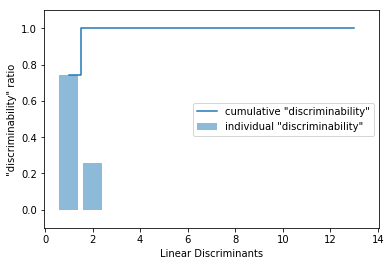

In [93]:
total = sum(eigenval)
discr = [(i/total) for i in sorted(eigenval,reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14),discr,alpha=0.5,align='center',label='individual "discriminability"')
plt.step(range(1,14),cum_discr,where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.legend(loc='best')
plt.ylim((-0.1,1.1))
plt.show()